In [1]:
import unittest
import numpy as np
import pygpufit.gpufit as gf
import matplotlib.pyplot as plt

(3, 20)
[4. 2.]
[[3.9999952 1.9999927]
 [0.        1.75     ]
 [0.        1.875    ]]


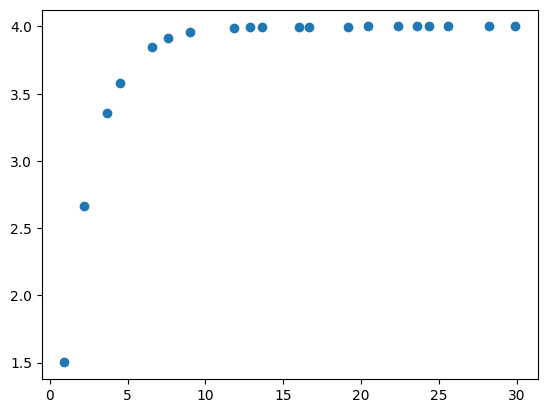

In [2]:
def generate_exponential_1d(parameters, x):

    a = parameters[0]
    b = parameters[1]

    y = a * (1- np.exp(-x/b))

    return y


n_fits = 3
n_points = 20
n_parameter = 2  

# true parameters
true_parameters = np.array((4, 2), dtype=np.float32)

# generate data
data = np.empty((n_fits, n_points), dtype=np.float32)
x = np.arange(n_points, dtype=np.float32)*1.5
x += np.random.rand(n_points)*1.4
data[0, :] = generate_exponential_1d(true_parameters, x)

# tolerance
tolerance = 0.001

# max_n_iterations
max_n_iterations = 10

# model id
model_id = gf.ModelID.SATURATION_1D

# initial parameters
initial_parameters = np.empty((n_fits, n_parameter), dtype=np.float32)
initial_parameters[0, :] = (1, 3)

# call to gpufit
# parameters, states, chi_squares, number_iterations, execution_time = gf.fit(data, None, model_id,
#                                                                             initial_parameters, tolerance, \
#                                                                             max_n_iterations, None, None, None)

parameters, states, chi_squares, number_iterations, execution_time = gf.fit(data, None, model_id,
                                                                            initial_parameters, tolerance, \
                                                                            max_n_iterations, None, None, x)

print(data.shape)
print(true_parameters)
print(parameters)

plt.plot(x, data[0], 'o')